In [48]:
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data = pd.read_csv('temps.csv')

In [12]:
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
year              348 non-null int64
month             348 non-null int64
day               348 non-null int64
week              348 non-null object
temp_2            348 non-null int64
temp_1            348 non-null int64
average           348 non-null float64
actual            348 non-null int64
forecast_noaa     348 non-null int64
forecast_acc      348 non-null int64
forecast_under    348 non-null int64
friend            348 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [13]:
data = data.drop('week', axis = 1)

In [15]:
y = data['actual']
x = data.drop('actual', axis = 1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 101)

In [17]:
model = tree.DecisionTreeRegressor(min_samples_leaf = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

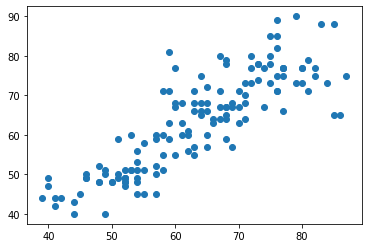

In [18]:
plt.scatter(y_test, y_pred)

In [21]:
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance Score: %.2f' % r2_score(y_test, y_pred))

Mean Squared Error: 43.47
Variance Score: 0.68


In [24]:
r2 = 0
leaf = 0
for i in range(1, 10):
    model = tree.DecisionTreeRegressor(min_samples_leaf = i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    if r2 < r2_score(y_test, y_pred):
        r2 = r2_score(y_test, y_pred)
        leaf = int(i)

In [25]:
print('Variance Score: %.2f' % r2)
print('Minimum sample leaf: %.2f' % leaf)

Variance Score: 0.81
Minimum sample leaf: 7.00


In [64]:
r2 = 0
trees = 0
leaf = 0

for i in range(1, 1000, 50):
    for j in range(1, 10):
        model_rf = RandomForestRegressor(n_estimators = i, min_samples_leaf = j)
        model_rf.fit(x_train, y_train)
        y_pred = model_rf.predict(x_test)
        if r2 < r2_score(y_test, y_pred):
            r2 = r2_score(y_test, y_pred)
            trees = i
            leaf = j
            
print('Variance Score: %.2f' % r2)
print('Number of trees: %.2f' % trees)
print('Minimum sample leaf: %.2f' % leaf)

Variance Score: 0.84
Number of trees: 101.00
Minimum sample leaf: 9.00


In [72]:
model_rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 8)
max_error = cross_val_score(model_rf, x, y, cv = 10, scoring = 'max_error')
exp_variance = cross_val_score(model_rf, x, y, cv = 10, scoring = 'explained_variance')
r2_cross = cross_val_score(model_rf, x, y, cv = 10, scoring = 'r2')
#print('Variance Score: %0.2f' % (round(cross_val.mean(), 5)))
print(max_error)
print(exp_variance)
print(r2_cross)

[ -8.72248728  -9.1541423  -12.27178224 -19.39370258 -18.93192261
  -8.64725505 -11.31531172 -13.56329727 -13.77457235 -13.35712346]
[ 0.33345441 -0.23310664  0.47005901  0.22763134  0.3378066   0.21343682
  0.35744241  0.42659101  0.41160103  0.11080551]
[ 0.27332232 -0.29955647  0.42733395  0.2349478   0.31301542  0.16335618
  0.39404963  0.26640087  0.32405794 -0.45336132]
